# **<div align="center">Superstore</div>**

**Abstract**|

Este estudio analiza un conjunto de datos de un Superstore de EEUU, que abarca varias variables relacionadas con el cliente y el pedido. El conjunto de datos incluye información como el ID del pedido, la fecha del pedido, la fecha de envío, el modo de envío, la identificación del cliente, el nombre del cliente, el segmento, la ciudad, el estado, el código postal, la región, el ID del producto, la categoría, la subcategoría, el nombre del producto y las ventas, cantidad, descuento y beneficio.

El objetivo de este estudio es explorar el conjunto de datos y descubrir información valiosa a través de técnicas de regresión y clasificación. Para el análisis de regresión, el estudio tiene como objetivo predecir las ventas y estimar las ganancias en función de diferentes variables, incluidas las características de los pedidos, las categorías de productos y la información relacionada con los clientes. Los resultados proporcionarán una comprensión integral de los factores que influyen en las ventas y la rentabilidad, lo que permitirá la toma de decisiones estratégicas para las proyecciones de ventas futuras y la optimización de las ganancias.

Además, el estudio también emplea métodos de clasificación para segmentar a los clientes y clasificar los modos de envío preferidos. Al considerar variables como el país, la región, los segmentos de clientes y las ganancias, el estudio tiene como objetivo identificar distintos grupos de clientes y adaptar las estrategias de marketing en consecuencia.

Los hallazgos de este estudio contribuirán a mejorar la comprensión general del comportamiento del cliente, optimizar las ventas y mejorar la eficiencia operativa en el hipermercado. Los resultados proporcionarán información útil para que los responsables de la toma de decisiones diseñen estrategias de marketing eficaces, optimicen la logística y maximicen la rentabilidad.

**Preguntas**


¿Cuáles son los productos más vendidos?

¿Qué categoría de productos genera los mayores ingresos y ganancias?

¿Cuál es la tendencia de las ganancias a lo largo del tiempo?

¿Qué segmento de clientes tiene el mayor impacto en las ventas?

¿Existe alguna relación entre las ventas y los descuentos?


**Hipótesis**

1. Existe una relación positiva entre los descuentos ofrecidos en los productos y las ventas generadas. Se espera que mayores descuentos resulten en un aumento en las ventas, ya que los clientes son más propensos a comprar cuando se les ofrece un descuento.
2.  Las ventas pueden variar significativamente según la región o el país. Factores como la población, el poder adquisitivo y las preferencias de los clientes en cada región pueden influir en las ventas de productos específicos.
3. Existen diferentes segmentos de clientes basados en variables como el país, la región, el segmento al que pertenecen y el valor de sus compras. Cada segmento puede tener características de compra y comportamientos diferentes, lo que permitiría adaptar estrategias de marketing específicas para cada grupo.

**Librerías**


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
datasets_ruta = '/content/gdrive/MyDrive/Desafios DATA SCIENCE - CODER HOUSE/Desafios '
ds4_file = 'Sample - Superstore.csv'

**Importar dataset**

In [ ]:
# Import data
superstore_df = pd.read_csv(datasets_ruta+'/'+ ds4_file, encoding='windows-1254')

## **EDA**

In [ ]:
# Características del dataset

print('Cantidad de filas y columnas: {} filas y {} columnas'.format(superstore_df.shape[0],
                                                                    superstore_df.shape[1]))

print('\nColumnas del dataset:')
col_names = superstore_df.columns
print(col_names)

print('\nInformación del dataset:')
print(superstore_df.info())

print('\nEstadísticas de las variables numéricas:')
superstore_df.describe().T

Cantidad de filas y columnas: 9994 filas y 21 columnas

Columnas del dataset:
Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   obj

,count,mean,std,min,25%,50%,75%,max
Row ID,9994.0,4997.500000,2885.163629,1.000,2499.25000,4997.5000,7495.750,9994.000
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.00000,56430.5000,90008.000,99301.000
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


In [ ]:
# Descripción variables categóricas
cat_cols = superstore_df.select_dtypes(['object']).columns

print('Descripción variables categóricas:\n')
for col in cat_cols:
  print('Valores únicos de la variable {}: {}'.format(col, superstore_df[col].unique().tolist()))

Descripción variables categóricas:

Valores únicos de la variable Order ID: ['CA-2016-152156', 'CA-2016-138688', 'US-2015-108966', 'CA-2014-115812', 'CA-2017-114412', 'CA-2016-161389', 'US-2015-118983', 'CA-2014-105893', 'CA-2014-167164', 'CA-2014-143336', 'CA-2016-137330', 'US-2017-156909', 'CA-2015-106320', 'CA-2016-121755', 'US-2015-150630', 'CA-2017-107727', 'CA-2016-117590', 'CA-2015-117415', 'CA-2017-120999', 'CA-2016-101343', 'CA-2017-139619', 'CA-2016-118255', 'CA-2014-146703', 'CA-2016-169194', 'CA-2015-115742', 'CA-2016-105816', 'CA-2016-111682', 'CA-2015-135545', 'US-2015-164175', 'CA-2014-106376', 'CA-2016-119823', 'CA-2016-106075', 'CA-2017-114440', 'US-2015-134026', 'US-2017-118038', 'US-2014-147606', 'CA-2016-127208', 'CA-2014-139451', 'CA-2015-149734', 'US-2017-119662', 'CA-2017-140088', 'CA-2017-155558', 'CA-2016-159695', 'CA-2016-109806', 'CA-2015-149587', 'US-2017-109484', 'CA-2017-161018', 'CA-2017-157833', 'CA-2016-149223', 'CA-2016-158568', 'CA-2016-129903', 'US-2

In [ ]:
# Revisar si hay datos nulos
superstore_df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

### **Visualizaciones**

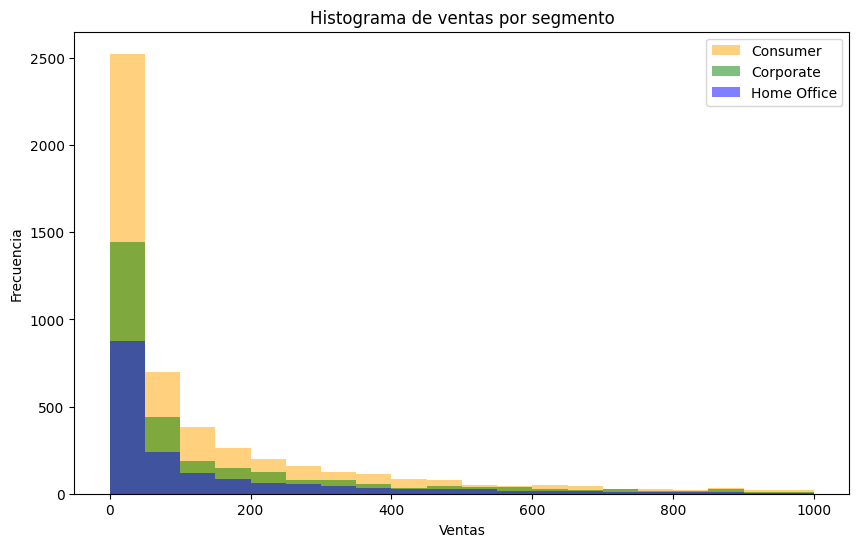

In [ ]:

# Filtrar los datos por las categorías deseadas
consumer_sales = superstore_df[superstore_df['Segment'] == 'Consumer']['Sales']
corporate_sales = superstore_df[superstore_df['Segment'] == 'Corporate']['Sales']
home_office_sales = superstore_df[superstore_df['Segment'] == 'Home Office']['Sales']

# Configurar el gráfico
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
plt.hist(consumer_sales, bins=20, range=(0, 1000), alpha=0.5, color='orange', label='Consumer')  # Histograma para la categoría "Consumer"
plt.hist(corporate_sales, bins=20, range=(0, 1000), alpha=0.5, color='green', label='Corporate')  # Histograma para la categoría "Corporate"
plt.hist(home_office_sales, bins=20, range=(0, 1000), alpha=0.5, color='blue', label='Home Office')  # Histograma para la categoría "Home Office"
plt.xlabel('Ventas')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y
plt.title('Histograma de ventas por segmento')  # Título del gráfico
plt.legend()  # Mostrar la leyenda

# Mostrar el gráfico
plt.show()


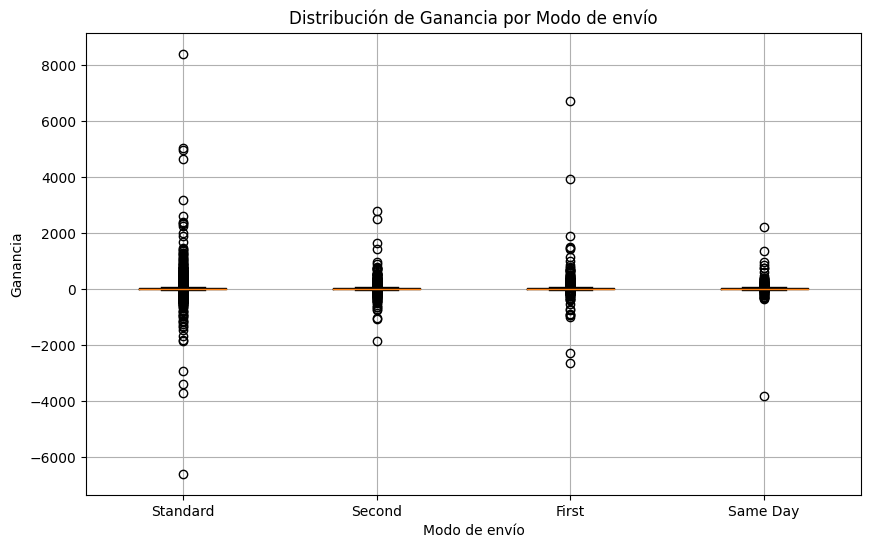

In [ ]:
# Filtrar los datos por cada modo de envío
standard_profit = superstore_df[superstore_df['Ship Mode'] == 'Standard Class']['Profit']
second_profit = superstore_df[superstore_df['Ship Mode'] == 'Second Class']['Profit']
first_profit = superstore_df[superstore_df['Ship Mode'] == 'First Class']['Profit']
same_day_profit = superstore_df[superstore_df['Ship Mode'] == 'Same Day']['Profit']

# Configurar el gráfico
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
plt.boxplot([standard_profit, second_profit, first_profit, same_day_profit])  # Crear el boxplot
plt.xlabel('Modo de envío')  # Etiqueta del eje x
plt.ylabel('Ganancia')  # Etiqueta del eje y
plt.title('Distribución de Ganancia por Modo de envío')  # Título del gráfico
plt.xticks([1, 2, 3, 4], ['Standard', 'Second', 'First', 'Same Day'])  # Etiquetas del eje x
plt.grid(True)  # Mostrar las líneas de la cuadrícula

# Mostrar el gráfico
plt.show()

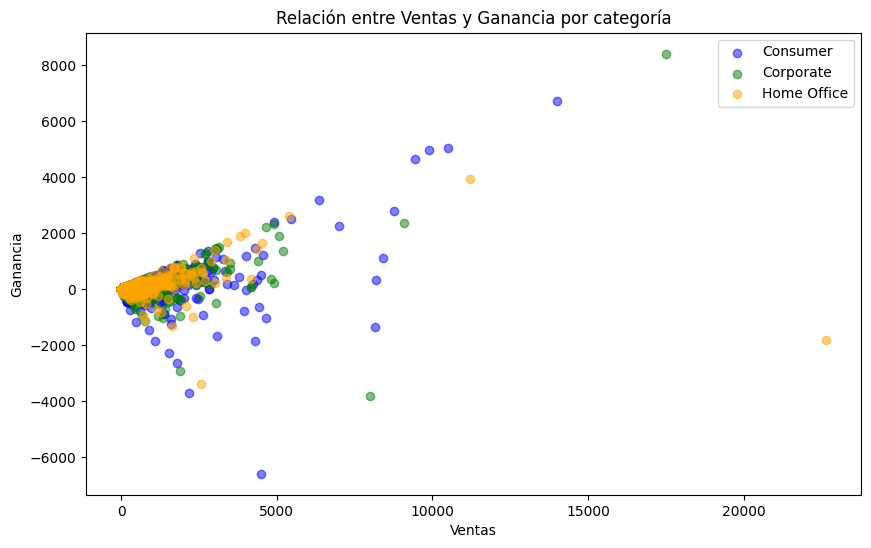

In [ ]:

# Filtrar los datos por cada categoría
consumer_sales = superstore_df[superstore_df['Segment'] == 'Consumer']['Sales']
consumer_profit = superstore_df[superstore_df['Segment'] == 'Consumer']['Profit']

corporate_sales = superstore_df[superstore_df['Segment'] == 'Corporate']['Sales']
corporate_profit = superstore_df[superstore_df['Segment'] == 'Corporate']['Profit']

home_office_sales = superstore_df[superstore_df['Segment'] == 'Home Office']['Sales']
home_office_profit = superstore_df[superstore_df['Segment'] == 'Home Office']['Profit']

# Configurar el gráfico
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
plt.scatter(consumer_sales, consumer_profit, c='blue', alpha=0.5, label='Consumer')  # Puntos para la categoría "Consumer"
plt.scatter(corporate_sales, corporate_profit, c='green', alpha=0.5, label='Corporate')  # Puntos para la categoría "Corporate"
plt.scatter(home_office_sales, home_office_profit, c='orange', alpha=0.5, label='Home Office')  # Puntos para la categoría "Home Office"
plt.xlabel('Ventas')  # Etiqueta del eje x
plt.ylabel('Ganancia')  # Etiqueta del eje y
plt.title('Relación entre Ventas y Ganancia por categoría')  # Título del gráfico
plt.legend()  # Mostrar la leyenda

# Mostrar el gráfico
plt.show()

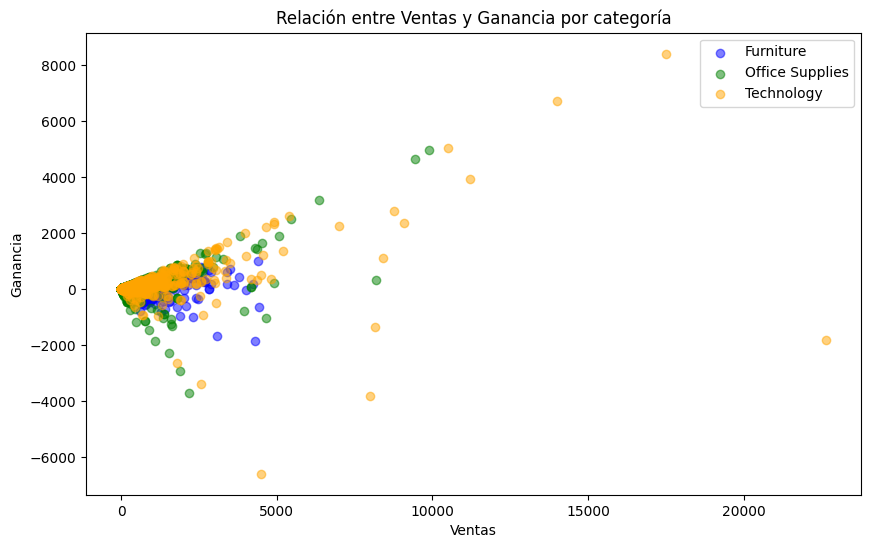

In [ ]:
# Filtrar los datos por cada categoría
furniture_sales = superstore_df[superstore_df['Category'] == 'Furniture']['Sales']
furniture_profit = superstore_df[superstore_df['Category'] == 'Furniture']['Profit']

office_supplies_sales = superstore_df[superstore_df['Category'] == 'Office Supplies']['Sales']
office_supplies_profit = superstore_df[superstore_df['Category'] == 'Office Supplies']['Profit']

technology_sales = superstore_df[superstore_df['Category'] == 'Technology']['Sales']
technology_profit = superstore_df[superstore_df['Category'] == 'Technology']['Profit']

# Configurar el gráfico
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
plt.scatter(furniture_sales, furniture_profit, c='blue', alpha=0.5, label='Furniture')  # Puntos para la categoría "Furniture"
plt.scatter(office_supplies_sales, office_supplies_profit, c='green', alpha=0.5, label='Office Supplies')  # Puntos para la categoría "Office Supplies"
plt.scatter(technology_sales, technology_profit, c='orange', alpha=0.5, label='Technology')  # Puntos para la categoría "Technology"
plt.xlabel('Ventas')  # Etiqueta del eje x
plt.ylabel('Ganancia')  # Etiqueta del eje y
plt.title('Relación entre Ventas y Ganancia por categoría')  # Título del gráfico
plt.legend()  # Mostrar la leyenda

# Mostrar el gráfico
plt.show()

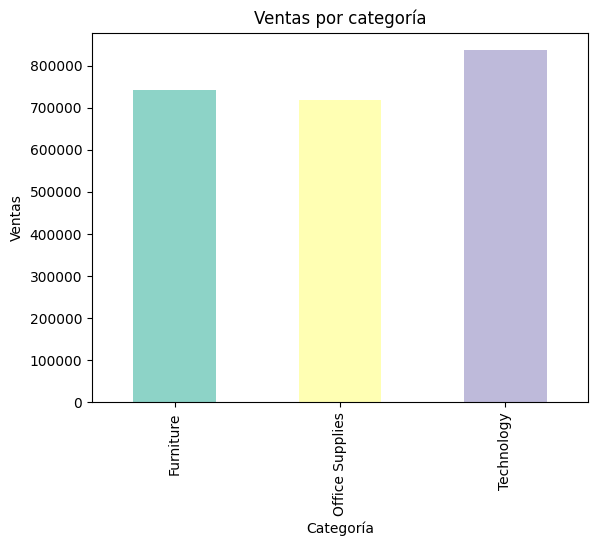

In [ ]:
ventas_por_categoria = superstore_df.groupby("Category")["Sales"].sum()

# Crear el gráfico de barras
ventas_por_categoria.plot(kind="bar",color=plt.cm.Set3.colors)
plt.title("Ventas por categoría")
plt.xlabel("Categoría")
plt.ylabel("Ventas")
plt.show()

### **Visualizaciones**

Según el gráfico anterior podría decirse que no hay una diferencia significativa en ventas por las distintas categorías

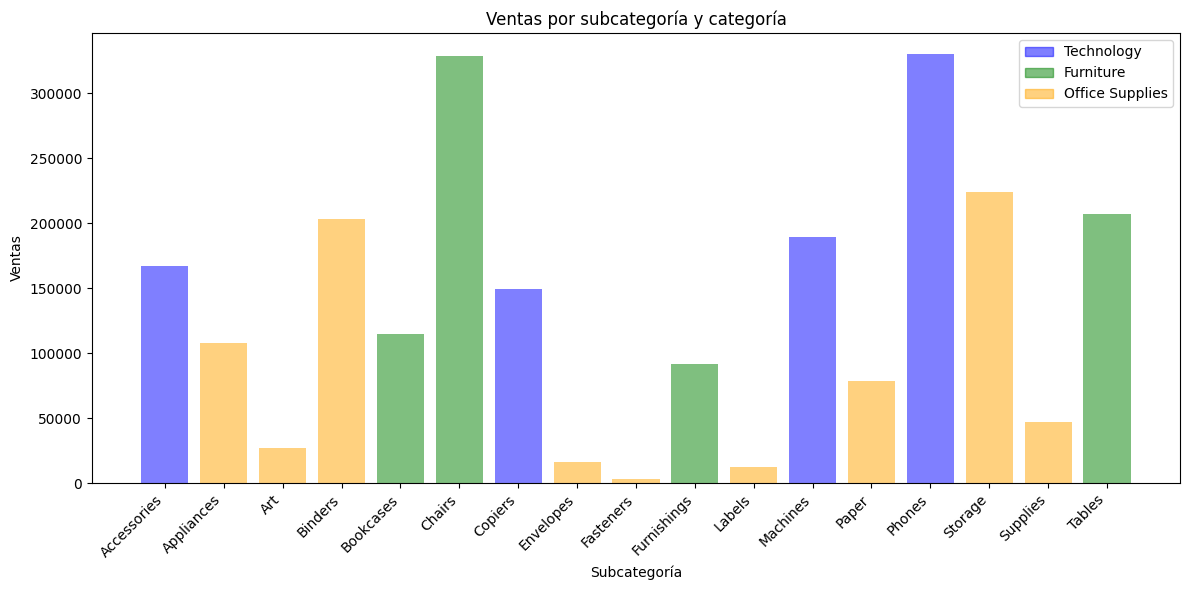

In [ ]:
from matplotlib.patches import Patch
# Asociación de subcategorías con categorías
asociacion_categorias = {
    'Technology': ['Phones', 'Accessories', 'Machines', 'Copiers'],
    'Furniture': ['Bookcases', 'Chairs', 'Tables', 'Furnishings']
}

# Función para obtener la categoría de una subcategoría
def obtener_categoria(subcategoria):
    for categoria, subcategorias in asociacion_categorias.items():
        if subcategoria in subcategorias:
            return categoria
    return 'Office Supplies'

# Crear una nueva columna en el DataFrame para la categoría de cada subcategoría
superstore_df['Categoria'] = superstore_df['Sub-Category'].apply(obtener_categoria)

# Calcular las ventas por subcategoría y categoría
ventas_por_categoria = superstore_df.groupby("Categoria")["Sales"].sum()
ventas_por_sub_categoria = superstore_df.groupby("Sub-Category")["Sales"].sum()

# Crear el gráfico de barras para ventas por subcategoría
plt.figure(figsize=(12, 6))

# Mapear colores a categorías
color_map = {'Technology': 'blue', 'Furniture': 'green', 'Office Supplies': 'orange'}

# Iterar sobre las subcategorías y agregar barras con colores y etiquetas de leyenda
for subcategoria, venta in ventas_por_sub_categoria.items():
    categoria = obtener_categoria(subcategoria)
    plt.bar(subcategoria, venta, color=color_map[categoria], label=categoria, alpha= 0.5)

# Crear la leyenda personalizada
handles = [Patch(color=color, label=categoria, alpha = 0.5) for categoria, color in color_map.items()]
plt.legend(handles=handles)

plt.title("Ventas por subcategoría y categoría")
plt.xlabel("Subcategoría")
plt.ylabel("Ventas")

plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mayor legibilidad
plt.tight_layout()  # Ajustar el diseño del gráfico
plt.show()

Al realizar la diferenciación por subcategorías vemos que las mayores ventas se dan en sillas y celulares.

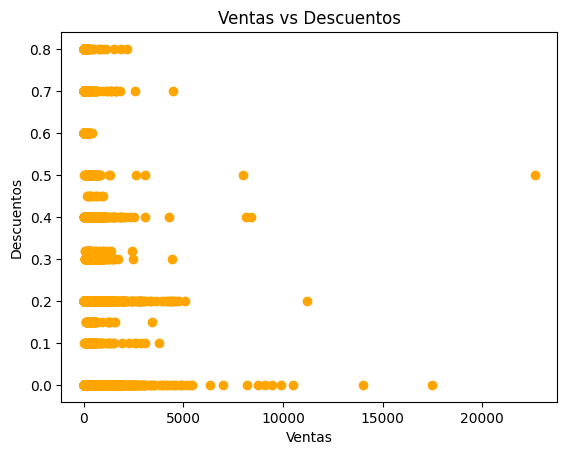

In [ ]:
# Scatterplot
plt.scatter(superstore_df["Sales"], superstore_df["Discount"],color='orange')
plt.title("Ventas vs Descuentos")
plt.xlabel("Ventas")
plt.ylabel("Descuentos")
plt.show()

No hay relación lineal entre ventas y descuentos

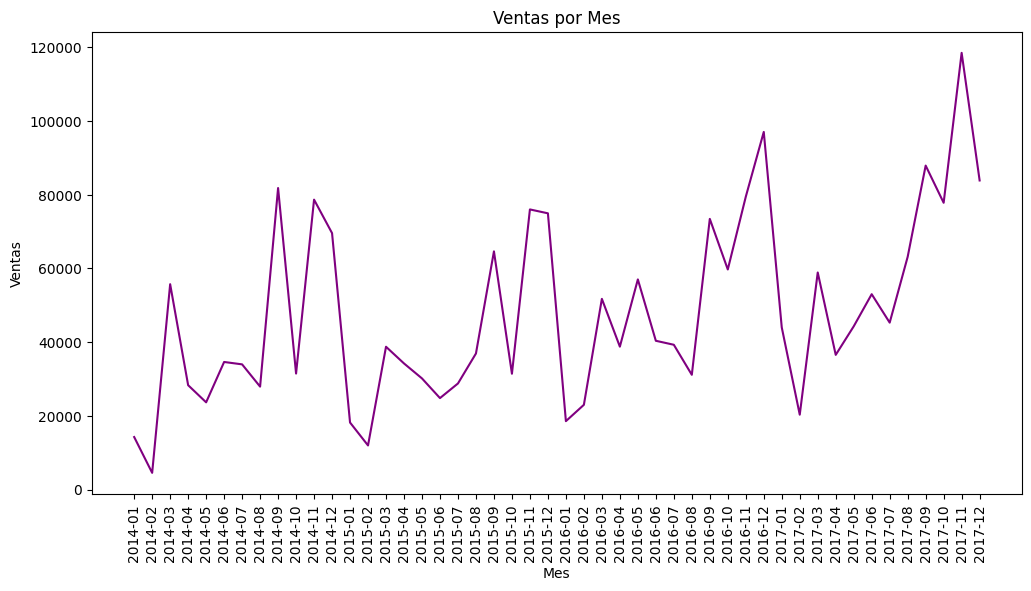

In [ ]:
# Convertir la columna de Fecha de Pedido en un objeto datetime
superstore_df['Order Date'] = pd.to_datetime(superstore_df['Order Date'])

# Ordenar el dataset por fecha
superstore_df = superstore_df.sort_values('Order Date')

# Agrupar los datos por mes y sumar las ventas
ventas_por_mes = superstore_df.groupby(superstore_df['Order Date'].dt.strftime('%Y-%m'))['Sales'].sum()

# Tamaño de la figura
plt.figure(figsize=(12, 6))
# Crear un gráfico de líneas
plt.plot(ventas_por_mes.index, ventas_por_mes.values,color='purple')
plt.title('Ventas por Mes')
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.xticks(rotation=90)

plt.show()

El anterior gráfico de líneas indica que entre enero y febrero tenemos mínimos de ventas y en los meses 11 y 12 tengo máximos en ventas en los diferentes años.

In [ ]:
subset_df = superstore_df.loc[superstore_df['Sub-Category'].isin(['Chairs', 'Phones'])]

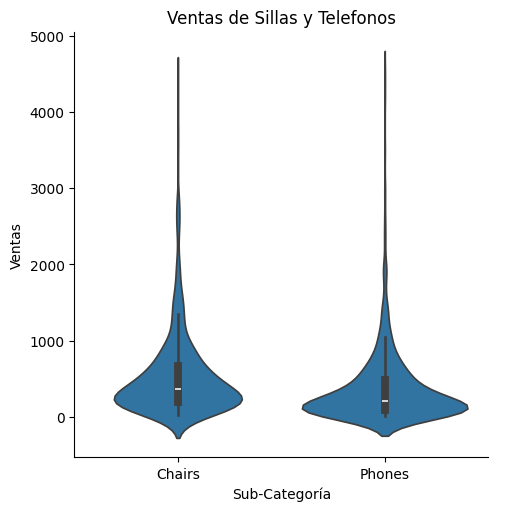

In [ ]:
# Filtrar las subcategorías de "Chairs" y "Phones"


# Crear el gráfico de violín
sns.catplot(x='Sub-Category', y='Sales', data=subset_df, kind='violin')
sns.set_palette("muted")

# Configurar el título y las etiquetas de los ejes
plt.title('Ventas de Sillas y Telefonos')
plt.xlabel('Sub-Categoría')
plt.ylabel('Ventas')

# Mostrar el gráfico
plt.show()

Analizando los dos productos mas vendidos, se puede concluir que son muchas ventas de monto pequeño.

### **MODELOS**

**Modelos**

El modelo intenta predecir la ganancia o beneficio de una transacción (representada por la variable "Profit") en función de otras características, como las ventas, la cantidad de productos vendidos, el descuento aplicado, la región, la categoría del producto, el modo de envío, etc. Este tipo de modelo podría ser útil para entender cómo ciertas características afectan la ganancia en una transacción y podría usarse para tomar decisiones comerciales.








In [ ]:
# Elimino columnas no deseadas del DataFrame
df_drop = superstore_df.drop(['Row ID', 'Order ID','City', 'Order Date', 'Ship Date', 'Customer ID', 'Customer Name',  'Country', 'Postal Code',  'Product ID','Product Name'], axis=1)


In [ ]:
df_drop.head()

,Ship Mode,Segment,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
# Estandarizo columnas numericas del DataFrame utilizando StandardScaler
scaler = StandardScaler()
scalecol = ['Sales', 'Quantity', 'Discount', 'Profit']
for i in scalecol:
    df_drop[i] = scaler.fit_transform(df_drop[[i]])

In [ ]:
# Selecciono columnas categóricas para codificar como variables dummy
lablecol = df_drop[['Ship Mode', 'Segment', 'State', 'Region', 'Category','Sub-Category']]

# Codifico variables categóricas como variables dummy
dummi = pd.get_dummies(lablecol, drop_first=True)

# Concateno variables dummy con el DataFrame df_drop
df_drop = pd.concat([df_drop, dummi], axis=1)

In [ ]:
# Elimino columnas originales después de la codificación
df_drop = df_drop.drop(['Ship Mode', 'Segment', 'State', 'Region', 'Category','Sub-Category'], axis=1)

In [ ]:
# Defino variable objetivo y las características
y = df_drop['Profit']
x = df_drop.drop(['Profit'], axis=1)

In [ ]:
# Divido los datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)


In [ ]:
# Ajusto diferentes modelos de regresión a los datos de entrenamiento
models = ['SVR','LinearRegression', 'RandomForestRegressor', 'DecisionTreeRegressor']
svr_model = SVR(kernel='rbf').fit(x_train, y_train)
lr_model = LinearRegression().fit(x_train, y_train)
rf_model = RandomForestRegressor(n_estimators=10, random_state=0).fit(x_train, y_train)
dt_model = DecisionTreeRegressor(random_state=0).fit(x_train, y_train)


In [ ]:
# Hago predicciones utilizando los modelos ajustados
svr_pred = svr_model.predict(x_test)
lr_pred = lr_model.predict(x_test)
rf_pred = rf_model.predict(x_test)
dt_pred = dt_model.predict(x_test)


In [ ]:
# Calculo los valores R cuadrado (R²) para cada modelo
R2_values = [r2_score(y_test, svr_pred),r2_score(y_test, lr_pred), r2_score(y_test, rf_pred), r2_score(y_test, dt_pred)]

# Ordeno los valores R² de forma descendente y obtener el mayor
R2_values = sorted(R2_values, reverse=True)
R2_values[0]

resultados_df = pd.DataFrame({'Algorithm': models, 'R Squared value': R2_values})

# Tabla de resultados
print(resultados_df.to_string(index=False))


            Algorithm  R Squared value
                  SVR         0.855164
     LinearRegression         0.812152
RandomForestRegressor         0.511125
DecisionTreeRegressor         0.275841


**Conclusiones**

- SVR (Support Vector Regressor): Tiene el valor R² más alto (0.855), lo que sugiere que este modelo explica aproximadamente el 85.5% de la variabilidad en la variable objetivo ("Profit"). Esto indica que el SVR podría ser el modelo más adecuado para hacer predicciones precisas sobre la ganancia.

- Linear Regression (Regresión Lineal): Tiene un valor R² de 0.812, lo que indica que explica alrededor del 81.2% de la variabilidad en la variable objetivo. Aunque es ligeramente menor que el SVR, sigue siendo un buen desempeño y puede ser considerado como una alternativa válida.

# Ajustes #


In [ ]:
# Evaluar la precisión del modelo RandomForestRegressor para diferentes valores de 'n_estimators' y 'random_state'
n_estimates_rndm_st = np.arange(10, 100, 10)
estimater_values = []
for i in n_estimates_rndm_st:
    rfr_selected_model = RandomForestRegressor(n_estimators=i, random_state=i).fit(x_train, y_train)
    rfr_pred = rfr_selected_model.predict(x_test)
    estimater_values.append(r2_score(y_test, rfr_pred))

In [ ]:
# +DataFrame con los valores de 'n_estimators' y 'Model Accuracy'
accuracy_df = pd.DataFrame({'n_estimators': n_estimates_rndm_st, 'Model Accuracy': estimater_values})

# Mostrar la tabla de resultados
print(accuracy_df)

   n_estimators  Model Accuracy
0            10        0.874105
1            20        0.853627
2            30        0.849126
3            40        0.877820
4            50        0.883783
5            60        0.848770
6            70        0.843351
7            80        0.829954
8            90        0.857931


Conclusion:
Finalmente, se puede ajustar para el valor de n_estimators y random_satate 10.

La precisión del modelo de ajuste es del 87,41%